In [4]:
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils.validation import column_or_1d

from math import pi
import numpy as np
import scipy as sp
#from qiskit.opflow import CircuitSampler, StateFn, AerPauliExpectation, PauliSumOp
from qiskit.quantum_info import Pauli
from qiskit.circuit.library import PauliEvolutionGate
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit_algorithms.optimizers import COBYLA, SLSQP, SPSA, L_BFGS_B
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import SciPyOptimizer
from qiskit.primitives import Sampler # new
from qiskit.quantum_info import SparsePauliOp,PauliList
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit.primitives import Estimator # new
import time
import pandas as pd
from qiskit.providers.basic_provider import BasicProvider #new
from multiprocessing import Pool
import multiprocessing as mp
from qiskit_algorithms.optimizers import SciPyOptimizer
import scipy as sp
from scipy.optimize import differential_evolution, Bounds
import os
from scipy.optimize import minimize
from qiskit_aer.primitives import Estimator

In [10]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dataset = fetch_ucirepo(id=151) 

X = dataset.data.features 
Y = dataset.data.targets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Attribute1   208 non-null    float64
 1   Attribute2   208 non-null    float64
 2   Attribute3   208 non-null    float64
 3   Attribute4   208 non-null    float64
 4   Attribute5   208 non-null    float64
 5   Attribute6   208 non-null    float64
 6   Attribute7   208 non-null    float64
 7   Attribute8   208 non-null    float64
 8   Attribute9   208 non-null    float64
 9   Attribute10  208 non-null    float64
 10  Attribute11  208 non-null    float64
 11  Attribute12  208 non-null    float64
 12  Attribute13  208 non-null    float64
 13  Attribute14  208 non-null    float64
 14  Attribute15  208 non-null    float64
 15  Attribute16  208 non-null    float64
 16  Attribute17  208 non-null    float64
 17  Attribute18  208 non-null    float64
 18  Attribute19  208 non-null    

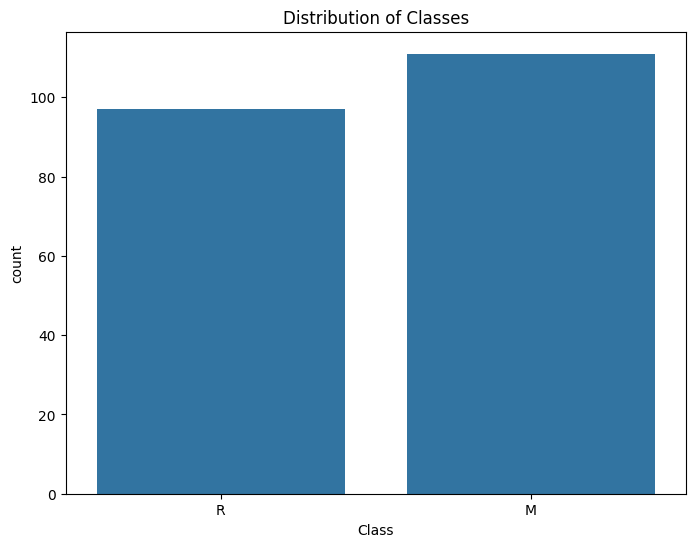

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your features stored in X and response variable in Y

# Create a DataFrame from your features X and response variable Y
data = X
data['Class'] = Y

# Display basic information about the dataset
print("Dataset information:")
print(data.info())

# Summary statistics of numerical features
print("\nSummary statistics of numerical features:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Distribution of target variable
print("\nDistribution of target variable:")
print(data['Class'].value_counts())

# Visualize distribution of the 'Class' variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Class')
plt.title('Distribution of Classes')
plt.show()


In [10]:
import pandas as pd

# Count the number of rocks (R) and minerals (M)
rock_count = data[data['Class'] == 'R'].shape[0]
mineral_count = data[data['Class'] == 'M'].shape[0]

# Create a summary table
summary_data = {
    'Number of Features': [data.shape[1] - 1],  # Subtract 1 for the 'Class' column
    'Number of Rows': [data.shape[0]],
    'Number of Rocks (R)': [rock_count],
    'Number of Minerals (M)': [mineral_count]
}

summary_table = pd.DataFrame(summary_data)

print(summary_table)



   Number of Features  Number of Rows  Number of Rocks (R)  \
0                  60             208                   97   

   Number of Minerals (M)  
0                     111  


In [14]:
num_folds = 10
seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
Y_train_1d = column_or_1d(Y_train)
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, Y_train_1d, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.771691 (0.091002)
LDA: 0.778676 (0.093570)
KNN: 0.758824 (0.106417)
CART: 0.745956 (0.073776)
NB: 0.682721 (0.136040)
SVM: 0.765074 (0.087519)


In [14]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, Y_train_1d, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\petre\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\petre\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\petre\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\petre\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

AB: 0.782721 (0.072445)
GBM: 0.808088 (0.130779)
RF: 0.802574 (0.107891)
ET: 0.874632 (0.081622)


In [12]:
from qiskit.circuit.library import ZZFeatureMap

num_features = 5

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)

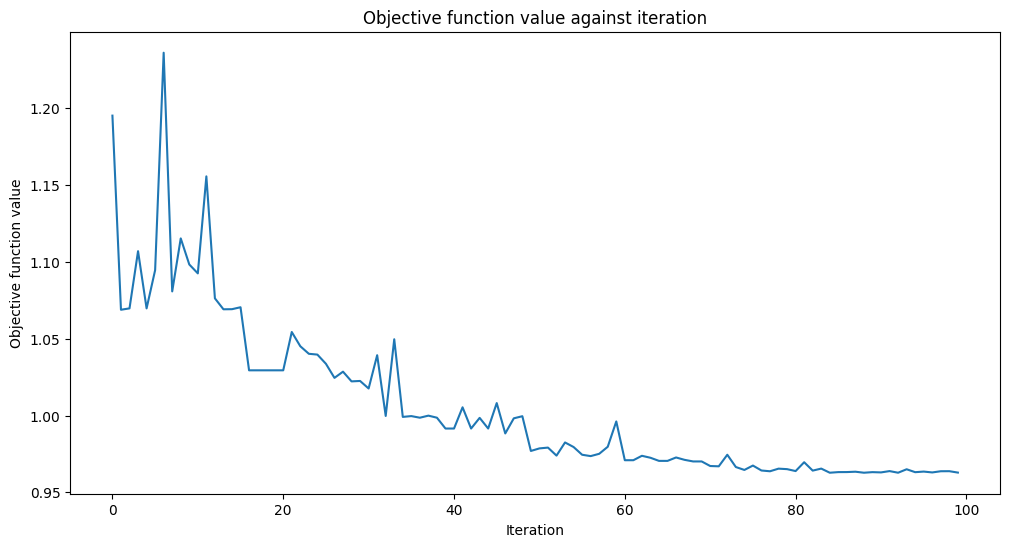

Training time: 132 seconds


In [15]:
from qiskit_algorithms.optimizers import COBYLA
import time
optimizer = COBYLA(maxiter=100)

from qiskit.primitives import Sampler

sampler = Sampler()

from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []
X_train_sliced = X_train.iloc[:, 0:5]
start = time.time()
vqc.fit(X_train_sliced, Y_train_1d)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [38]:
X_validation_sliced = X_validation.iloc[:, 0:5]

train_score_q4 = vqc.score(X_train_sliced, Y_train_1d)
test_score_q4 = vqc.score(X_validation_sliced, Y_validation)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.61
Quantum VQC on the test dataset:     0.69


<Axes: >

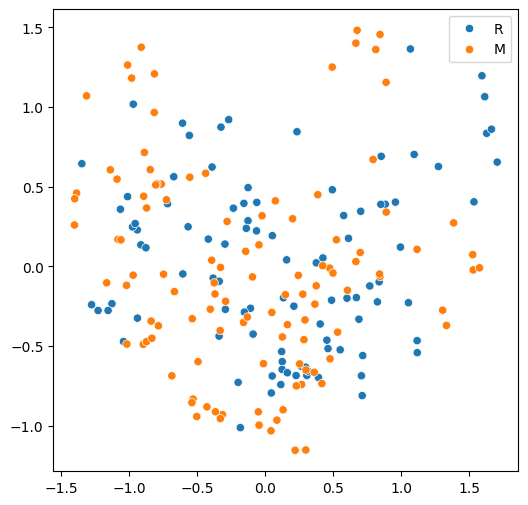

In [49]:
#PCA
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import seaborn as sns
features = PCA(n_components=2).fit_transform(X)
Y_1d = column_or_1d(Y)
plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=Y_1d, palette="tab10")

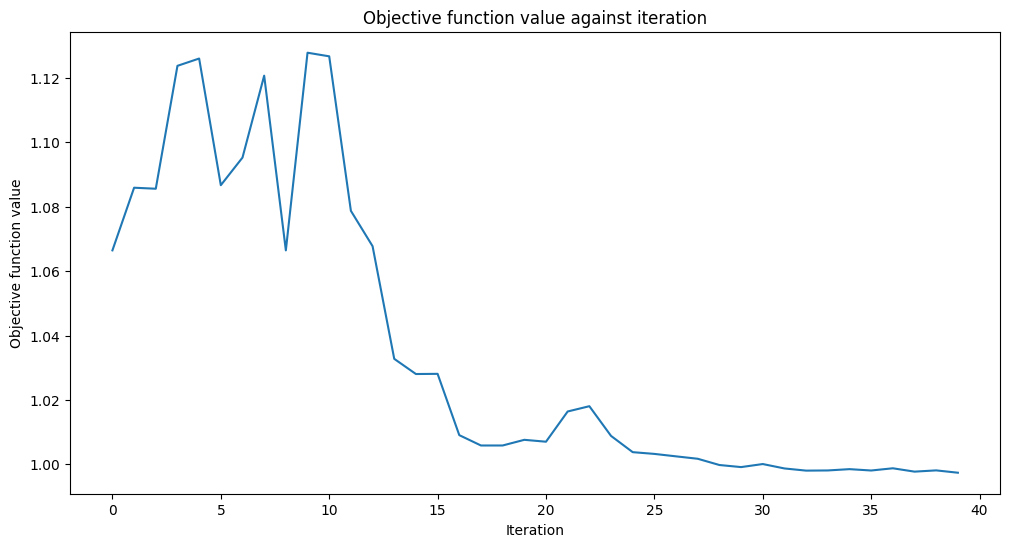

Training time: 22 seconds


In [50]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, Y, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value



svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)

train_labels_1d = column_or_1d(train_labels)
start = time.time()
vqc.fit(train_features, train_labels_1d)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [51]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.54
Quantum VQC on the test dataset using RealAmplitudes:     0.55


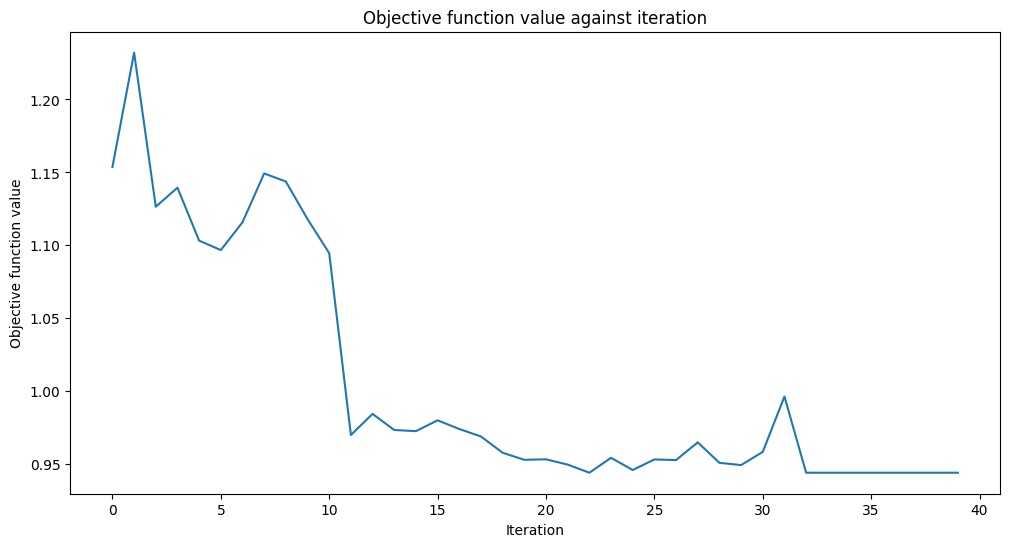

Training time: 68 seconds


In [55]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=5, reps=3)
feature_map = ZZFeatureMap(feature_dimension=5, reps=1)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(X_train_sliced, Y_train_1d)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [57]:
train_score_q2_eff = vqc.score(X_train_sliced, Y_train_1d)
test_score_q2_eff = vqc.score(X_validation_sliced,Y_validation)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.62
Quantum VQC on the test dataset using EfficientSU2:     0.55


In [4]:
num_folds = 10
seed = 7
scoring = 'accuracy'

X_train_sliced = X_train.iloc[:, 0:5]

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
Y_train_1d = column_or_1d(Y_train)
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train_sliced, Y_train_1d, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.548529 (0.150059)
LDA: 0.615074 (0.073125)
KNN: 0.578676 (0.103937)
CART: 0.521324 (0.114654)
NB: 0.566544 (0.107884)
SVM: 0.603309 (0.109550)


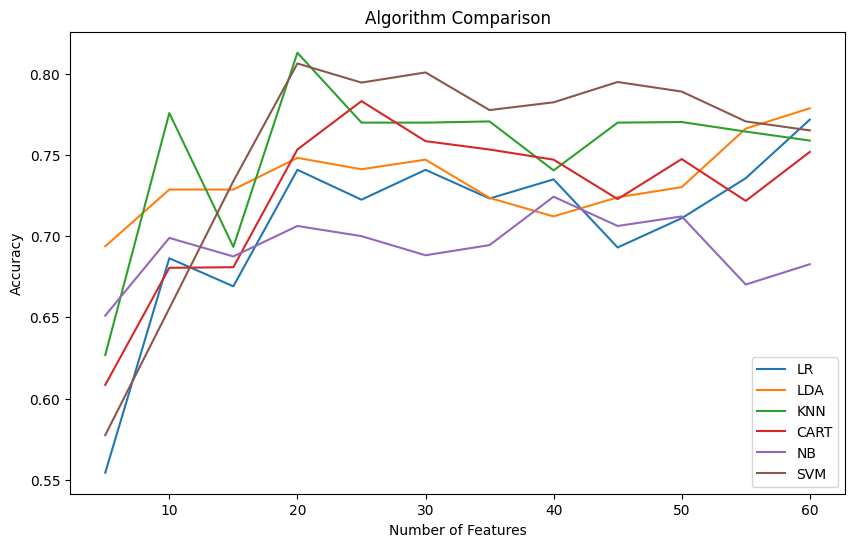

In [11]:
import numpy as np
import matplotlib.pyplot as plt

num_folds = 10
seed = 7
scoring = 'accuracy'
sizes = range(5, len(X_train.columns) + 1, 5)  # Increase X_train_sliced by 5 columns in each iteration

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Y_train_1d = column_or_1d(Y_train)

accuracy_results = {name: [] for name, _ in models}

for size in sizes:
    X_train_sliced = X_train.sample(n=size, axis=1, random_state=1)
    results = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, X_train_sliced, Y_train_1d, cv=kfold, scoring=scoring)
        results.append(cv_results.mean())
        msg = "%s: %f" % (name, cv_results.mean())
        #print(msg)
        accuracy_results[name].append(cv_results.mean())

# Plotting
plt.figure(figsize=(10, 6))
for name, accuracies in accuracy_results.items():
    plt.plot(sizes, accuracies, label=name)

plt.title('Algorithm Comparison')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
accuracy_results

{'LR': [0.5544117647058824,
  0.6863970588235294,
  0.6691176470588236,
  0.7408088235294118,
  0.7224264705882353,
  0.7408088235294118,
  0.7231617647058824,
  0.7349264705882353,
  0.6930147058823529,
  0.7110294117647059,
  0.7356617647058823,
  0.7716911764705883],
 'LDA': [0.69375,
  0.7286764705882354,
  0.7286764705882354,
  0.7481617647058824,
  0.7411764705882353,
  0.7470588235294118,
  0.7235294117647059,
  0.7121323529411765,
  0.7238970588235294,
  0.7301470588235294,
  0.7661764705882352,
  0.7786764705882352],
 'KNN': [0.6268382352941176,
  0.775735294117647,
  0.6933823529411764,
  0.8128676470588235,
  0.7698529411764706,
  0.7698529411764705,
  0.7705882352941176,
  0.7404411764705883,
  0.7698529411764705,
  0.770220588235294,
  0.7643382352941176,
  0.7588235294117647],
 'CART': [0.6084558823529412,
  0.6805147058823529,
  0.6808823529411765,
  0.7533088235294118,
  0.7830882352941176,
  0.7584558823529411,
  0.7533088235294118,
  0.7470588235294118,
  0.7227941176

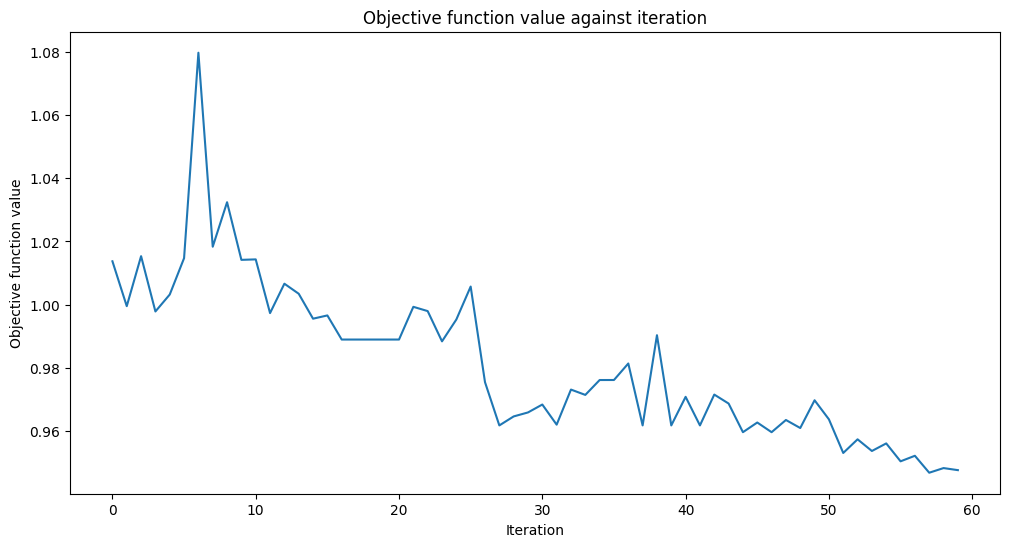

Training time: 86 seconds


In [15]:
from qiskit_algorithms.optimizers import COBYLA
import time
optimizer = COBYLA(maxiter=60)

X_train_sliced = X_train.sample(n=5, axis=1, random_state=1)
X_validation_sliced = X_validation.sample(n=5, axis=1, random_state=1)
num_features = X_train_sliced.shape[1]
from qiskit.primitives import Sampler

sampler = Sampler()

from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []
start = time.time()
vqc.fit(X_train_sliced, Y_train_1d)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [18]:
X_validation_sliced = X_validation.sample(n=5, axis=1, random_state=1)
train_score_q4 = vqc.score(X_train_sliced, Y_train_1d)
test_score_q4 = vqc.score(X_validation_sliced, Y_validation)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.58
Quantum VQC on the test dataset:     0.67


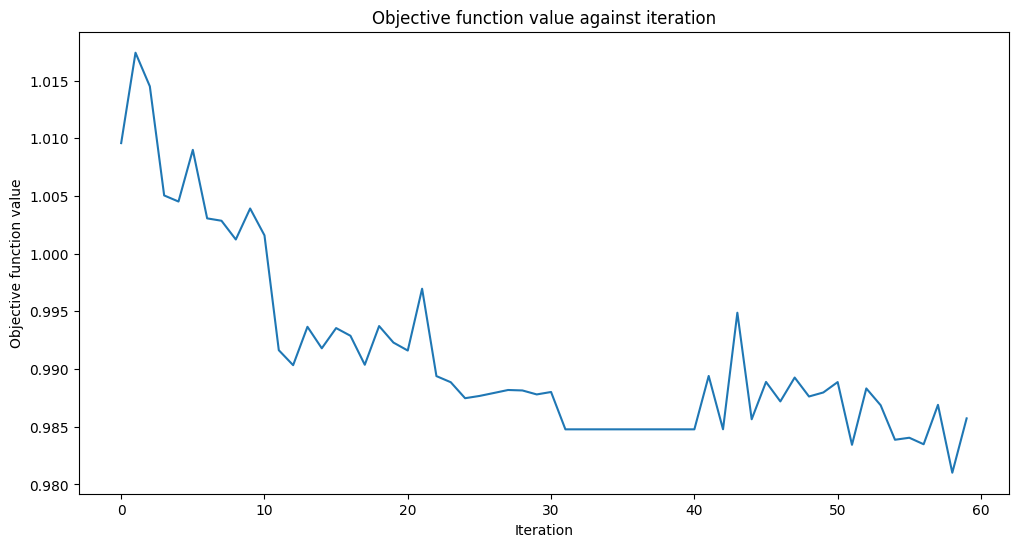

Training time: 353 seconds


In [20]:
from qiskit_algorithms.optimizers import COBYLA
import time
optimizer = COBYLA(maxiter=60)

X_train_sliced = X_train.sample(n=10, axis=1, random_state=1)
X_validation_sliced = X_validation.sample(n=10, axis=1, random_state=1)
num_features = X_train_sliced.shape[1]
from qiskit.primitives import Sampler

from qiskit.circuit.library import ZZFeatureMap

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)

sampler = Sampler()

from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []
start = time.time()
vqc.fit(X_train_sliced, Y_train_1d)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [22]:
X_validation_sliced = X_validation.sample(n=10, axis=1, random_state=1)
train_score_q4 = vqc.score(X_train_sliced, Y_train_1d)
test_score_q4 = vqc.score(X_validation_sliced, Y_validation)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.64
Quantum VQC on the test dataset:     0.64


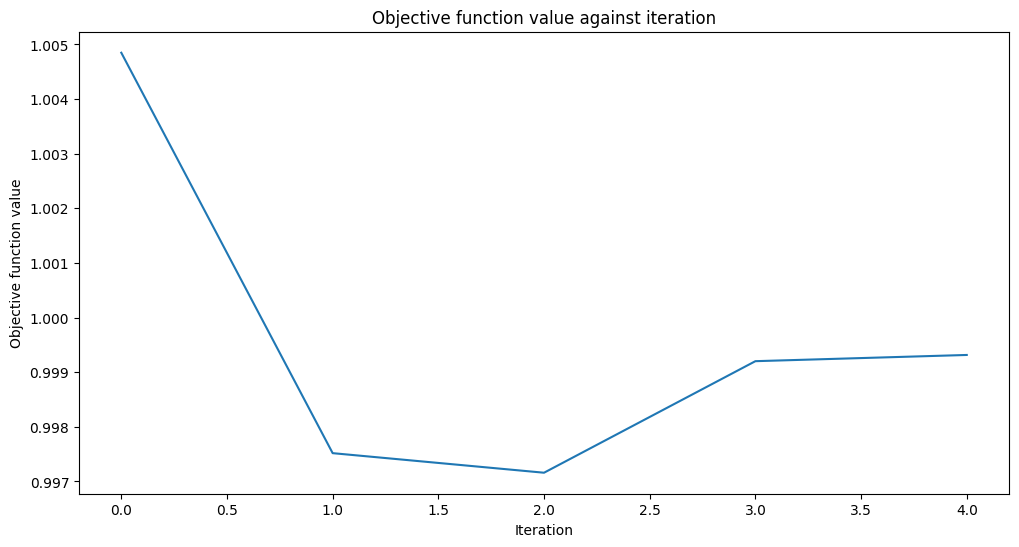

Training time: 700 seconds


In [25]:
from qiskit_algorithms.optimizers import COBYLA
import time
optimizer = COBYLA(maxiter=5)

X_train_sliced = X_train.sample(n=15, axis=1, random_state=1)
X_validation_sliced = X_validation.sample(n=15, axis=1, random_state=1)
num_features = X_train_sliced.shape[1]
from qiskit.primitives import Sampler

from qiskit.circuit.library import ZZFeatureMap

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)

sampler = Sampler()

from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []
start = time.time()
vqc.fit(X_train_sliced, Y_train_1d)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [26]:
X_validation_sliced = X_validation.sample(n=15, axis=1, random_state=1)
train_score_q4 = vqc.score(X_train_sliced, Y_train_1d)
test_score_q4 = vqc.score(X_validation_sliced, Y_validation)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.56
Quantum VQC on the test dataset:     0.50


In [ ]:
from qiskit_aer import Aer
##################################### Instructions for the energy evaluation ###############################################
def evaluate_expectation(parameters_values):
    # Function to evaluate the expectation value of the Hamiltonian for a given set of parameters
    # Inputs: parameter_values (ndarray), parameter values
    # Outputs: result (float), energy value

    value_dict = dict(zip(ansatz.parameters, parameters_values))
    pars =  list(value_dict.values())
    expectation_value = estimator.run(ansatz,qubit_op,pars).result().values
    return np.real(expectation_value)


# Simulations are noiseless and without sampling. 
#backend = Aer.get_backend('aer_simulator') old
device = BasicProvider().get_backend('basic_simulator')
coupling_map = device.configuration().coupling_map
 
# If a noise model is provided, the Aer primitives
# perform a "qasm" simulation
estimator = Estimator(
            backend_options={ # method chosen automatically to match options
                "coupling_map": coupling_map,
            },
            run_options={"seed": 42, "shots": 64},
            transpile_options={"seed_transpiler": 42},
        )

def schwefel(params):
    return 418.9829 * len(params) - np.sum(params * np.sin(np.sqrt(np.abs(params))))

class Individual:
    """Individual of the population. It holds parameters of the solution as well as the fitness of the solution."""
    def __init__(self, params, fitness):
        self.params = params
        self.fitness = fitness

    def __repr__(self):
        return '{} fitness: {}'.format(self.params, self.fitness)

def evaluate(params):
    return evaluate_expectation(params)

def generate_population(size, dimension, VarMin, VarMax):
    def cost_function_wrapper(params):
        return evaluate(params)

    pop = VarMin + np.random.rand(size, dimension) * (VarMax - VarMin)
    fitness = np.apply_along_axis(cost_function_wrapper, 1, pop)
    
    population = []
    for i in range(size):
        individual = Individual(pop[i], fitness[i])
        population.append(individual)

    return population

starttime = time.time()                                             # Start the timer
print('Hello! iSOMA is working, please wait... ')
dimension = 4*features                                                      # Number of dimensions of the problem
# -------------- Control Parameters of SOMA -------------------------------
N_jump, Step = 10, 0.3                                              # Assign values ​​to variables: Step, PRT, PathLength
PopSize, Max_Migration, Max_FEs = 100, 100, 10*dimension**4         # Assign values ​​to variables: PopSize, Max_Migration
m, n, s = 10, 5, 15
# -------------- The domain (search space) --------------------------------
VarMin, VarMax = -np.pi, np.pi   # for Schwefel's function.                    # Define the search range

population = generate_population(PopSize, dimension, VarMin, VarMax)
pop = np.array([ind.params for ind in population])
fitness = np.array([ind.fitness for ind in population])
FEs = PopSize                                                       # Count the number of function evaluations
the_best_cost = np.min(fitness)                                     # Find the Global minimum fitness value
# ---------------- SOMA MIGRATIONS ----------------------------------------
best_cost_old = the_best_cost
Migration, Count = 0, 0                                             # Assign values ​​to variables: Migration
while np.abs(the_best_cost+features-1)>=1e-1:                                                # Terminate when reaching Max_Migration / User can change to Max_FEs
    Migration = Migration + 1                                       # Increase Migration value
    # ------------ Migrant selection: m -----------------------------------
    M = np.random.choice(range(PopSize),m,replace=False)         # Migrant selection: m
    M_sort = np.argsort(fitness[M])
    for j in range(n):                                              # Choose n individuals move toward the Leader
        Migrant = pop[M[M_sort[j]]].reshape(dimension, 1)        # Get the Migrant position (solution values) in the current population
        # ------------ Leader selection: k --------------------------------
        K = np.random.choice(range(PopSize),s,replace=False)     # Leader selection: k
        K_sort = np.argsort(fitness[K])
        Leader = pop[K[K_sort[1]]].reshape(dimension, 1)         # Get the Migrant position (solution values) in the current population
        if M[M_sort[j]] == K[K_sort[1]]:                            # Don't move if it is itself
            Leader = pop[K[K_sort[2]]].reshape(dimension, 1)     # Get the Migrant position (solution values) in the current population
        # ------ Migrant move to Leader: Jumping --------------------------
        flag, move = 0, 1
        while (flag == 0) and (move <= N_jump):
            nstep = (N_jump-move+1) * Step
            # ------ Update Control parameters: PRT -----------------------
            PRT = 0.1 + 0.9*(FEs / Max_FEs);                        # Update PRT parameter
            # ----- SOMA Mutation -----------------------------------------
            PRTVector = (np.random.rand(dimension,1)<PRT)*1      # If rand() < PRT, PRTVector = 1, else, 0
            #PRTVector = (PRTVector - 1) * (1 - FEs/Max_FEs) + 1     # If rand() < PRT, PRTVector = 1, else, FEs/Max_FEs
            offspring = Migrant + (Leader - Migrant) * nstep * PRTVector # Jumping towards the Leader
            # ------------ Check and put individuals inside the search range if it's outside
            for rw in range(dimension):                             # From row: Check
                if offspring[rw]<VarMin or offspring[rw]>VarMax:    # if outside the search range
                    offspring[rw] = VarMin + np.random.rand() * (VarMax - VarMin) # Randomly put it inside
            # ------------ Evaluate the offspring and Update --------------
            new_cost = evaluate(offspring.flatten())                      # Evaluate the offspring
            FEs = FEs + 1                                           # Count the number of function evaluations
            # ----- SOMA Accepting: Place the Best Offspring to Pop -------
            if new_cost <= fitness[M[M_sort[j]]]:                   # Compare min_new_cost with fitness value of the moving individual
                flag = 1
                fitness[M[M_sort[j]]] = new_cost                    # Replace the moving individual fitness value
                pop[M[M_sort[j]]] = offspring.flatten()                  # Replace the moving individual position (solution values)
                if new_cost <= the_best_cost:                       # Compare Current minimum fitness with Global minimum fitness
                    the_best_cost = new_cost                        # Update Global minimun fitness value
                    the_best_value = offspring                      # Update Global minimun position
                else:
                    Count = Count + 1
            move = move + 1
    if Count > PopSize*50:
        if the_best_cost == best_cost_old:
            rat = round(0.1*PopSize)
            pop_temp = VarMin + np.random.rand(dimension, rat)*(VarMax-VarMin)
            fit_temp = evaluate(pop_temp.flatten())
            FEs = FEs + rat
            D = np.random.choice(range(PopSize),rat,replace=False)
            pop[D] = pop_temp.T
            fitness[D] = fit_temp
        else:
            best_cost_old = the_best_cost
        Count = 0
# %%%%%%%%%%%%%%%%%%    E N D    S O M A     %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
endtime = time.time()                                               # Stop the timer
caltime = endtime - starttime                                       # Caculate the processing time
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Show the information to User
print('Stop at Migration :  ', Migration)
print('The number of FEs :  ', FEs)
print('Processing time   :  ', caltime, '(s)')
print('The best cost     :  ', the_best_cost)
#print('Solution values   :  ', the_best_value)

timer = []
timer.append(caltime)